<a href="https://colab.research.google.com/github/dondreojordan/Project-Notebook-Code/blob/master/Spotify_Features_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Colab Notes 
(Use this space to record any notes during drafting. Remove before final draft)

**To-Do:**
Learn code to separate tracks by genre and graph using

>Fine Tune Graphs being used for blog post

>For reference, number graphs

>Learn another way to have the dataset so it is not in your local files

>


In [4]:
import plotly

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os
import random
import math
from sklearn import preprocessing

from numpy import array
from numpy import mean
from numpy import std
from numpy import cov
from numpy.linalg import eig

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [6]:
#Loaded dataset form files. 

from google.colab import files
uploaded = files.upload()

Saving SpotifyFeatures.csv to SpotifyFeatures.csv


In [81]:
spotifyfeatures_original = pd.read_csv('SpotifyFeatures.csv')
# pd.read()
spotifyfeatures = spotifyfeatures_original.copy()
# Make a copy of the original dataset
df = spotifyfeatures
# Test dataset Copy

print("Spotify Features Dataframe Shape: ", spotifyfeatures_original.shape)
spotifyfeatures_original

# Spotifyfeatures head/tail

Spotify Features Dataframe Shape:  (232725, 18)


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.61100,0.389,99373,0.910,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.24600,0.590,137373,0.737,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.95200,0.663,170267,0.131,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.70300,0.240,152427,0.326,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.95000,0.331,82625,0.225,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232720,Soul,Slave,Son Of Slide,2XGLdVl7lGeq8ksM6Al7jT,39,0.00384,0.687,326240,0.714,0.544000,D,0.0845,-10.626,Major,0.0316,115.542,4/4,0.962
232721,Soul,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,38,0.03290,0.785,282447,0.683,0.000880,E,0.2370,-6.944,Minor,0.0337,113.830,4/4,0.969
232722,Soul,Muddy Waters,(I'm Your) Hoochie Coochie Man,2ziWXUmQLrXTiYjCg2fZ2t,47,0.90100,0.517,166960,0.419,0.000000,D,0.0945,-8.282,Major,0.1480,84.135,4/4,0.813
232723,Soul,R.LUM.R,With My Words,6EFsue2YbIG4Qkq8Zr9Rir,44,0.26200,0.745,222442,0.704,0.000000,A,0.3330,-7.137,Major,0.1460,100.031,4/4,0.489


In [78]:
spotifyfeatures.columns

# Let's rename the column headers and use the .columns to match spelling.

Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')

In [84]:
spotifyfeatures.rename({'genre':'Genre', 'artist_name':'Artist', 'track_name':'Song', 'track_id':'Track ID', 'popularity':'Popularity',
       'acousticness':'Acousticness', 'danceability':'Danceability', 'duration_ms':'Song Duration, m/s', 'energy':'Energy',
       'instrumentalness':'Instrumentalness', 'key':'Key Signature', 'liveness':'Liveness', 'loudness':'Loudness', 'mode':'Mode',
       'speechiness':'Speechiness', 'tempo':'Tempo', 'time_signature':'Time_Signature', 'valence':'Valence'}, axis=1, inplace=True)

# Code Renames columns for Root Spotify Features Dataset.

spotifyfeatures

,Genre,Artist,Song,Track ID,Popularity,Acousticness,Danceability,"Song Duration, m/s",Energy,Instrumentalness,Key Signature,Liveness,Loudness,Mode,Speechiness,Tempo,Time_Signature,Valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.61100,0.389,99373,0.910,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.24600,0.590,137373,0.737,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.95200,0.663,170267,0.131,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.70300,0.240,152427,0.326,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.95000,0.331,82625,0.225,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232720,Soul,Slave,Son Of Slide,2XGLdVl7lGeq8ksM6Al7jT,39,0.00384,0.687,326240,0.714,0.544000,D,0.0845,-10.626,Major,0.0316,115.542,4/4,0.962
232721,Soul,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,38,0.03290,0.785,282447,0.683,0.000880,E,0.2370,-6.944,Minor,0.0337,113.830,4/4,0.969
232722,Soul,Muddy Waters,(I'm Your) Hoochie Coochie Man,2ziWXUmQLrXTiYjCg2fZ2t,47,0.90100,0.517,166960,0.419,0.000000,D,0.0945,-8.282,Major,0.1480,84.135,4/4,0.813
232723,Soul,R.LUM.R,With My Words,6EFsue2YbIG4Qkq8Zr9Rir,44,0.26200,0.745,222442,0.704,0.000000,A,0.3330,-7.137,Major,0.1460,100.031,4/4,0.489


In [85]:
spotifyfeatures_original.drop_duplicates(subset='track_name')
print('Shape after dropping: ', spotifyfeatures.shape)

# Drop duplicate tracks

Shape after dropping:  (232725, 18)


In [ ]:
spotifyfeatures.drop(columns=['track_id'], inplace=True)

# Removing unneccesary columns 

In [88]:
spotifyfeatures.describe()
# Spotify Features Statistics Features

,Popularity,Acousticness,Danceability,"Song Duration, m/s",Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


In [89]:
spotifyfeatures.describe(exclude='number')
# Spotify Features Categorical Feautres

,Genre,Artist,Song,Track ID,Key Signature,Mode,Time_Signature
count,232725,232725,232725,232725,232725,232725,232725
unique,27,14564,148615,176774,12,2,5
top,Comedy,Giuseppe Verdi,Home,6AIte2Iej1QKlaofpjCzW1,C,Major,4/4
freq,9681,1394,100,8,27583,151744,200760


In [91]:
spotifyfeatures.columns

Index(['Genre', 'Artist', 'Song', 'Track ID', 'Popularity', 'Acousticness',
       'Danceability', 'Song Duration, m/s', 'Energy', 'Instrumentalness',
       'Key Signature', 'Liveness', 'Loudness', 'Mode', 'Speechiness', 'Tempo',
       'Time_Signature', 'Valence'],
      dtype='object')

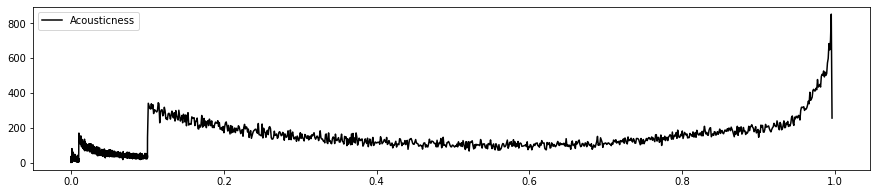

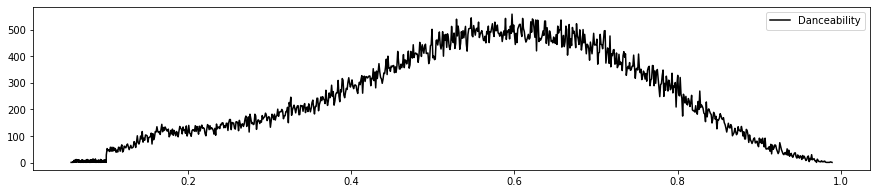

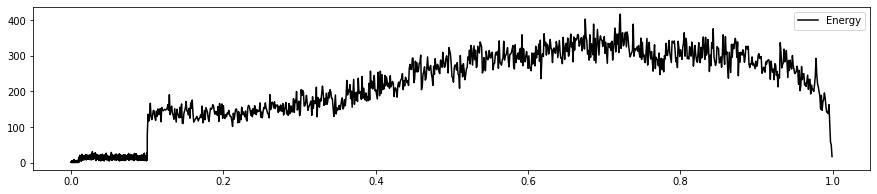

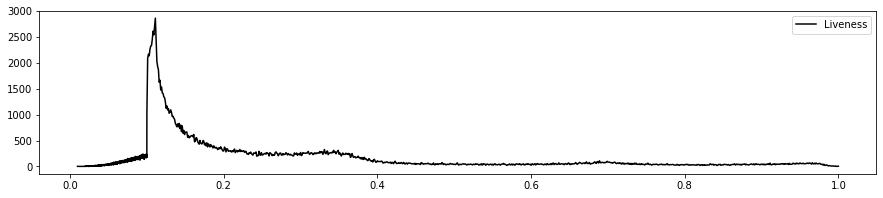

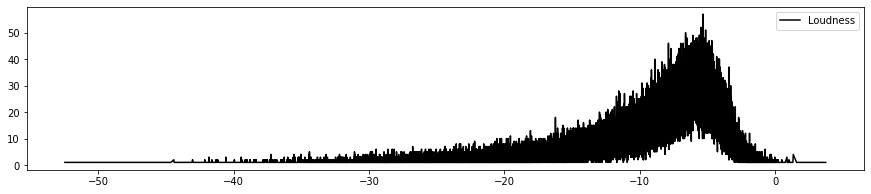

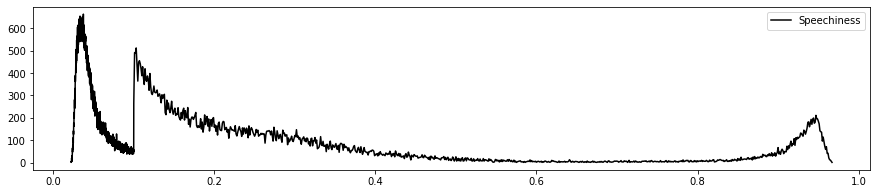

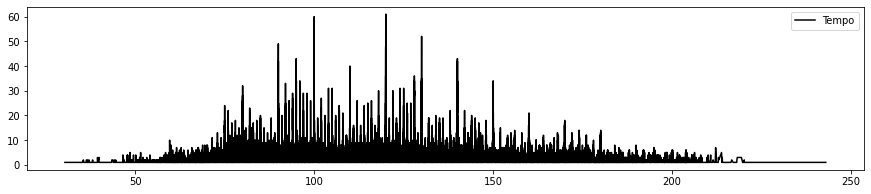

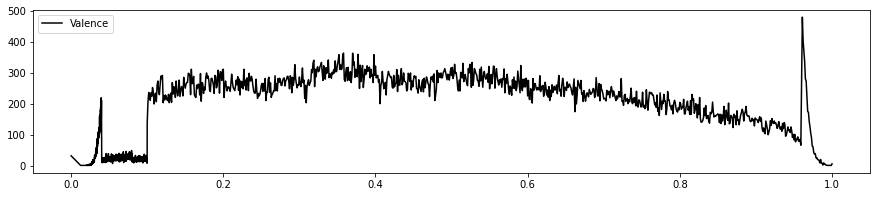

In [99]:
Acousticness = spotifyfeatures['Acousticness'].value_counts().sort_index()
Acousticness_df = pd.DataFrame(data=Acousticness)
Acousticness_df.plot(figsize=(15,3), color='k');
# Acousticness_df
Danceability = spotifyfeatures['Danceability'].value_counts().sort_index()
Danceability_df = pd.DataFrame(data=Danceability)
Danceability_df.plot(figsize=(15,3), color='k');
# Danceability_df
Energy = spotifyfeatures['Energy'].value_counts().sort_index()
Energy_df = pd.DataFrame(data=Energy)
Energy_df.plot(figsize=(15,3), color='k');
# Energy
Liveness = spotifyfeatures['Liveness'].value_counts().sort_index()
Liveness_df = pd.DataFrame(data=Liveness)
Liveness_df.plot(figsize=(15,3), color='k');
# Liveness
Loudness = spotifyfeatures['Loudness'].value_counts().sort_index()
Loudness_df = pd.DataFrame(data=Loudness)
Loudness_df.plot(figsize=(15,3), color='k');
# Loudness
Speechiness = spotifyfeatures['Speechiness'].value_counts().sort_index()
Speechiness_df = pd.DataFrame(data=Speechiness)
Speechiness_df.plot(figsize=(15,3), color='k');
# Speechiness
Tempo = spotifyfeatures['Tempo'].value_counts().sort_index()
Tempo_df = pd.DataFrame(data=Tempo)
Tempo_df.plot(figsize=(15,3), color='k');
# Tempo
Valence = spotifyfeatures['Valence'].value_counts().sort_index()
Valence_df = pd.DataFrame(data=Valence)
Valence_df.plot(figsize=(15,3), color='k');
# Valence
######### DELETE CELL ###########

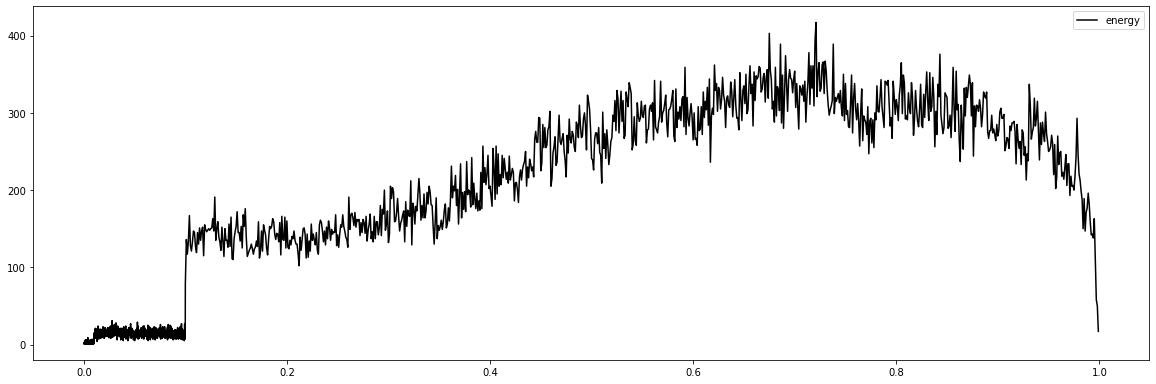

In [46]:
energy = spotifyfeatures['energy'].value_counts().sort_index()
energy_df = pd.DataFrame(data=energy)
energy_df.plot(figsize=(20,6.5), color='k');

# Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. 

# Typically, energetic tracks feel fast, loud, and noisy. 
# For example, death metal has high energy, while a Bach prelude scores low on the scale. 
# Perceptual features contributing to this attribute include dynamic range, perceived loudness,
# timbre, onset rate, and general entropy. 


# The distribution of values for this feature look like this:

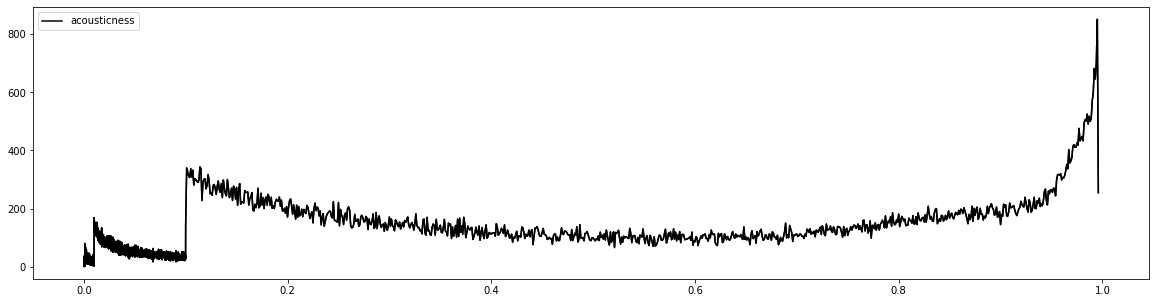

In [45]:
acousticness = df['acousticness'].value_counts().sort_index()
acousticness_df = pd.DataFrame(data=acousticness)
acousticness_df.plot(figsize=(20,6.5), color='k');


df['acousticness'].value_counts().sort_index().plot(figsize=(20,5),color='k');

# A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 
# 1.0 represents high confidence the track is acoustic. 

#The distribution of values for this feature look like this:

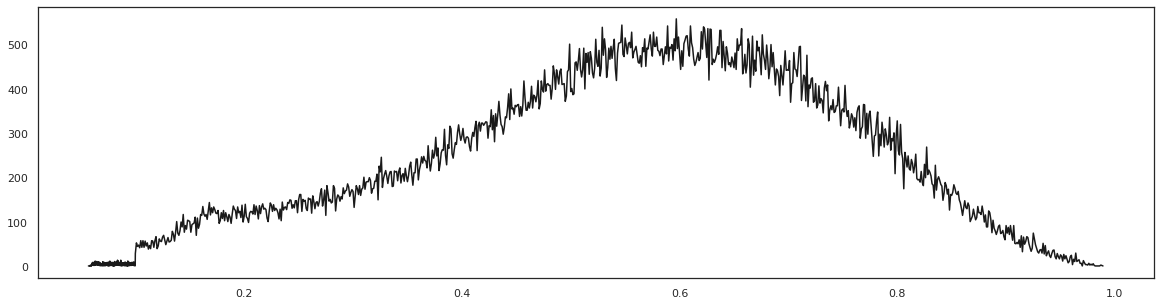

In [158]:
df['danceability'].value_counts().sort_index().plot(figsize=(20,5),color='k');

# A value of 0.0 is least danceable and 1.0 is most danceable. 

# Danceability describes how suitable a track is for dancing based on a combination of musical elements 
# including tempo, rhythm stability, beat strength, and overall regularity. 

# The distribution of values for this feature look like this:

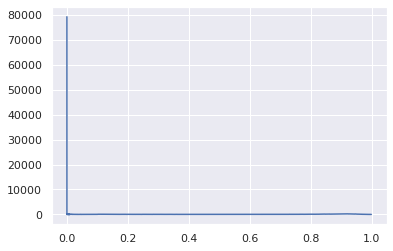

In [ ]:
df['instrumentalness'].value_counts().sort_index().plot.line();

#	Predicts whether a track contains no vocals. 
# “Ooh” and “aah” sounds are treated as instrumental in this context. 
# Rap or spoken word tracks are clearly “vocal”. 

# The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. 
#Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. 

# The distribution of values for this feature look like this:

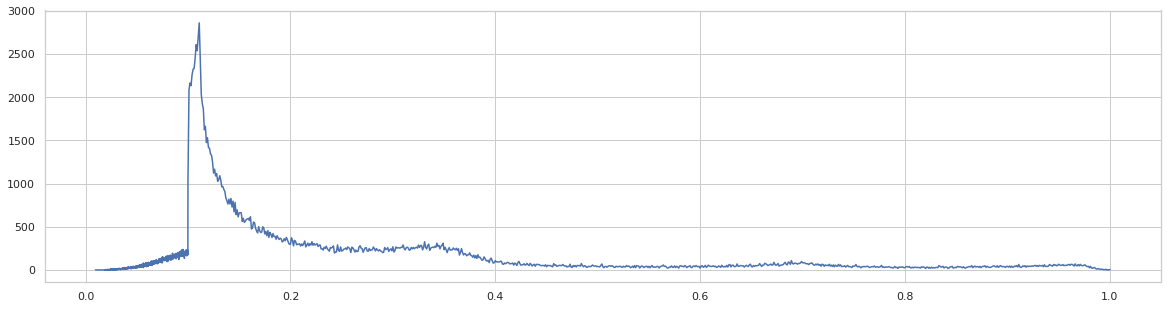

In [ ]:
df['liveness'].value_counts().sort_index().plot(figsize=(20,5));

# 	Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live. The distribution of values for this feature look like this:

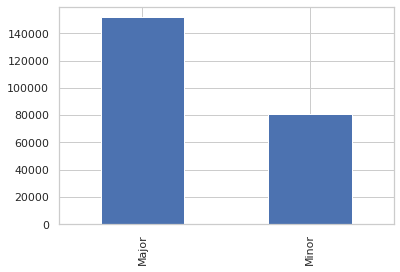

In [ ]:
df['mode'].value_counts().sort_index().plot.bar();

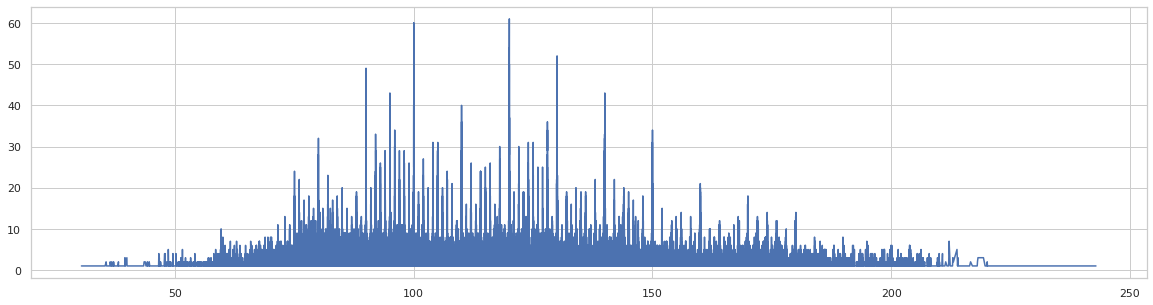

In [ ]:
df['tempo'].value_counts().sort_index().plot(figsize=(20,5));

# The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. The distribution of values for this feature look like this:

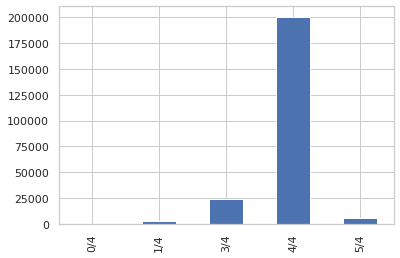

In [ ]:
df['time_signature'].value_counts().sort_index().plot.bar();

# An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).
# The distribution of values for this feature look like this:

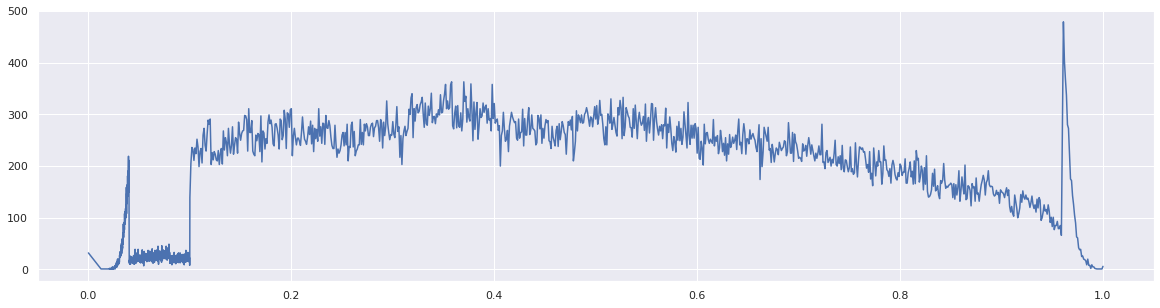

In [ ]:
df['valence'].value_counts().sort_index().plot(figsize=(20,5));

# A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. 
# Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry). 

# The distribution of values for this feature look like this:

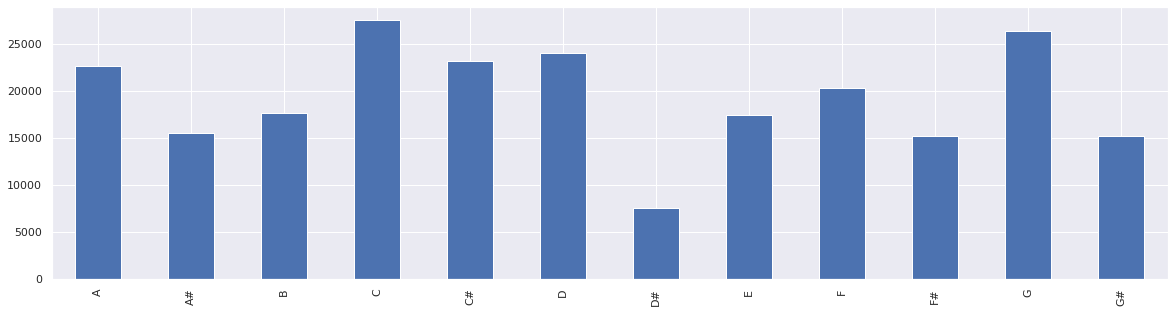

In [ ]:
df['key'].value_counts().sort_index().plot.bar(figsize=(20,5));

# The estimated overall key of the track. Integers map to pitches using standard Pitch Class Notation.
# 

In [ ]:
spotifyfeatures.columns

Index(['genre', 'artist_name', 'track_name', 'popularity', 'acousticness',
       'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'speechiness', 'tempo',
       'time_signature', 'valence'],
      dtype='object')

In [ ]:

data = spotifyfeatures

combo = [('loudness', 'energy'), ('loudness', 'danceability'), ('acousticness', 'energy'),('valence', 'energy'), ('valence', 'danceability'), ('valence', 'loudness'),('instrumentalness', 'acousticness'), ('sections', 'duration_ms'), ('danceability', 'speechiness')]

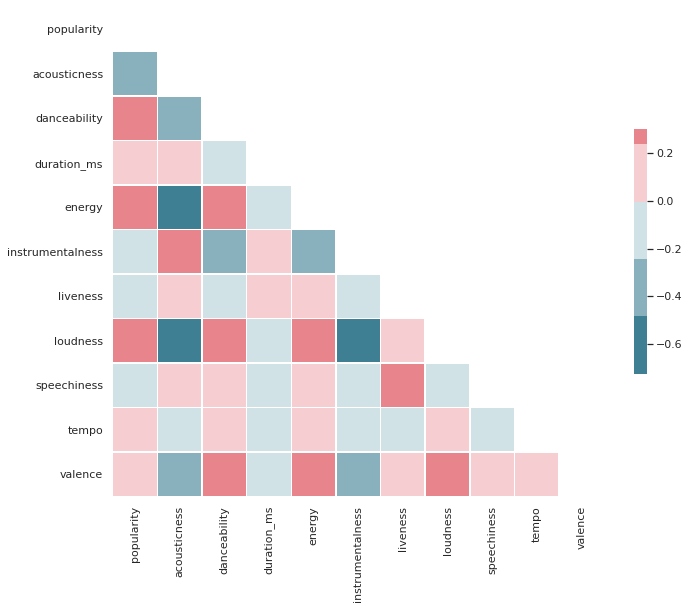

In [ ]:

sns.set(style="white")
# Generate a large random dataset
d = spotifyfeatures
# Compute the correlation matrix
corr = d.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=False)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=False, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [145]:
 import plotly.graph_objects as go
import numpy as np

N = 100000
fig = go.Figure(data=go.Scattergl(
    x = 2,
    y = 54,
    mode='markers',
    marker=dict(
        color=np.random.randn(N),
        colorscale='Viridis',
        line_width=1
    )
))

fig.show()

ValueError: ignored

In [101]:
import plotly.express as px
df = spotifyfeatures
fig = px.scatter_3d(df, x='energy', y='valence', z='danceability',
                    color='tempo')
fig.show()

## Do Not Run This Cell
## Will Slow Down The Notebook

ValueError: ignored

In [100]:
#Test Sample

from random import sample

test_one =  spotifyfeatures.sample(500)

test_two =  spotifyfeatures.sample(5000)

test_three =  spotifyfeatures.sample(100000)

In [ ]:
test_one

In [102]:
import plotly.express as px
test = test_one
fig = px.scatter_3d(test, x='valence', y='energy', z='danceability',
                    color='popularity')
fig.show()

# 3D scatterplot of a random sample from dataset

ValueError: ignored

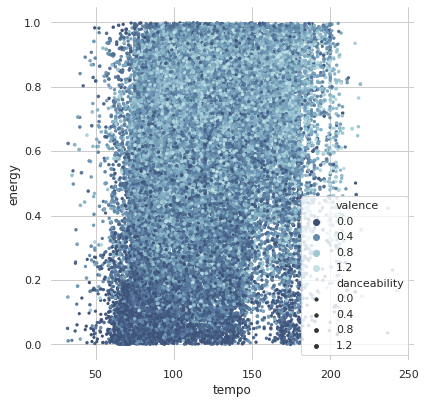

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Load the example dataset
diamonds = test_one

# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
clarity_ranking = ["1", "2", "3", "4", "5", "6", "7", "8"]
sns.scatterplot(x="tempo", y="energy",
                hue="valence", size="danceability",
                palette="ch:r=-.2,d=.3_r",
                hue_order=clarity_ranking,
                sizes=(10, 15), linewidth=0,
                data=diamonds, ax=ax)

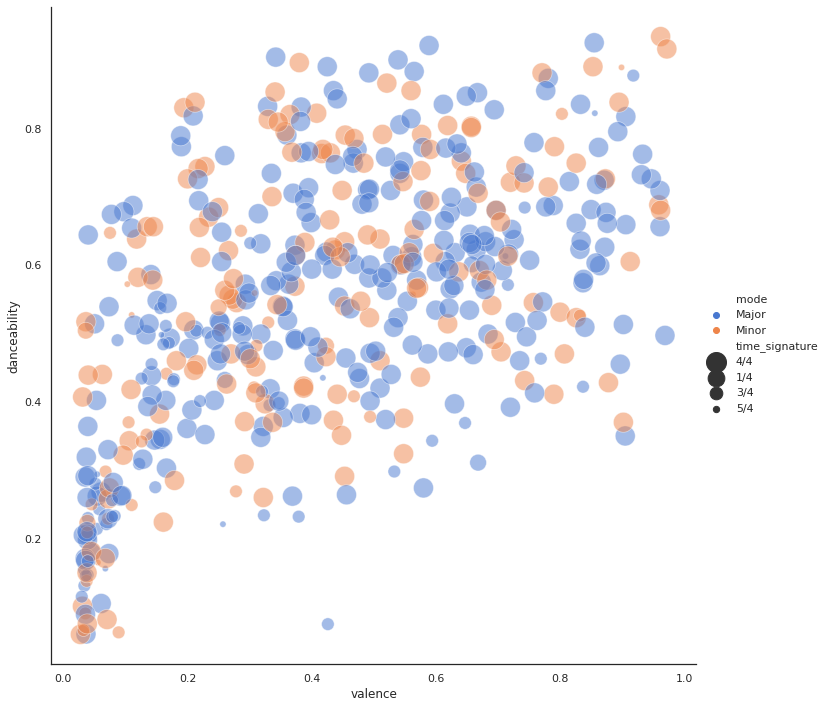

In [ ]:
import seaborn as sns
sns.set(style="white")

# Load the example mpg dataset
mpg = []

# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="valence", y="danceability", hue="mode", size="time_signature",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=10, data=test)

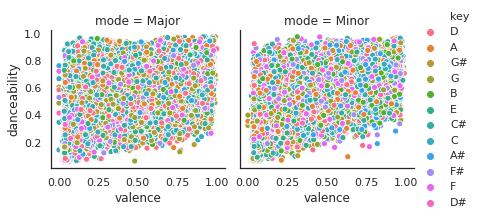

In [ ]:
sns.relplot(x="valence", y="danceability", hue="key",
            col="mode", data=mpg, height=3);

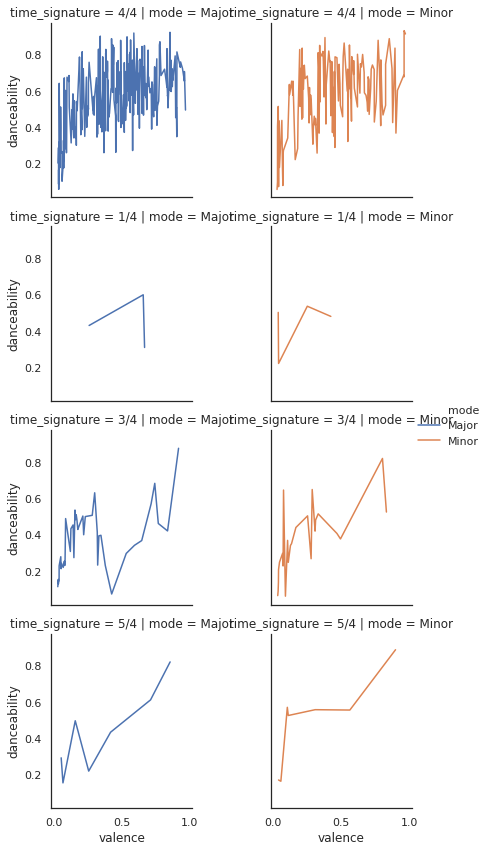

In [ ]:
sns.relplot(x="valence", y="danceability", hue="mode",
            col="mode", row="time_signature", height=3,
            kind="line", estimator=None, data=test);

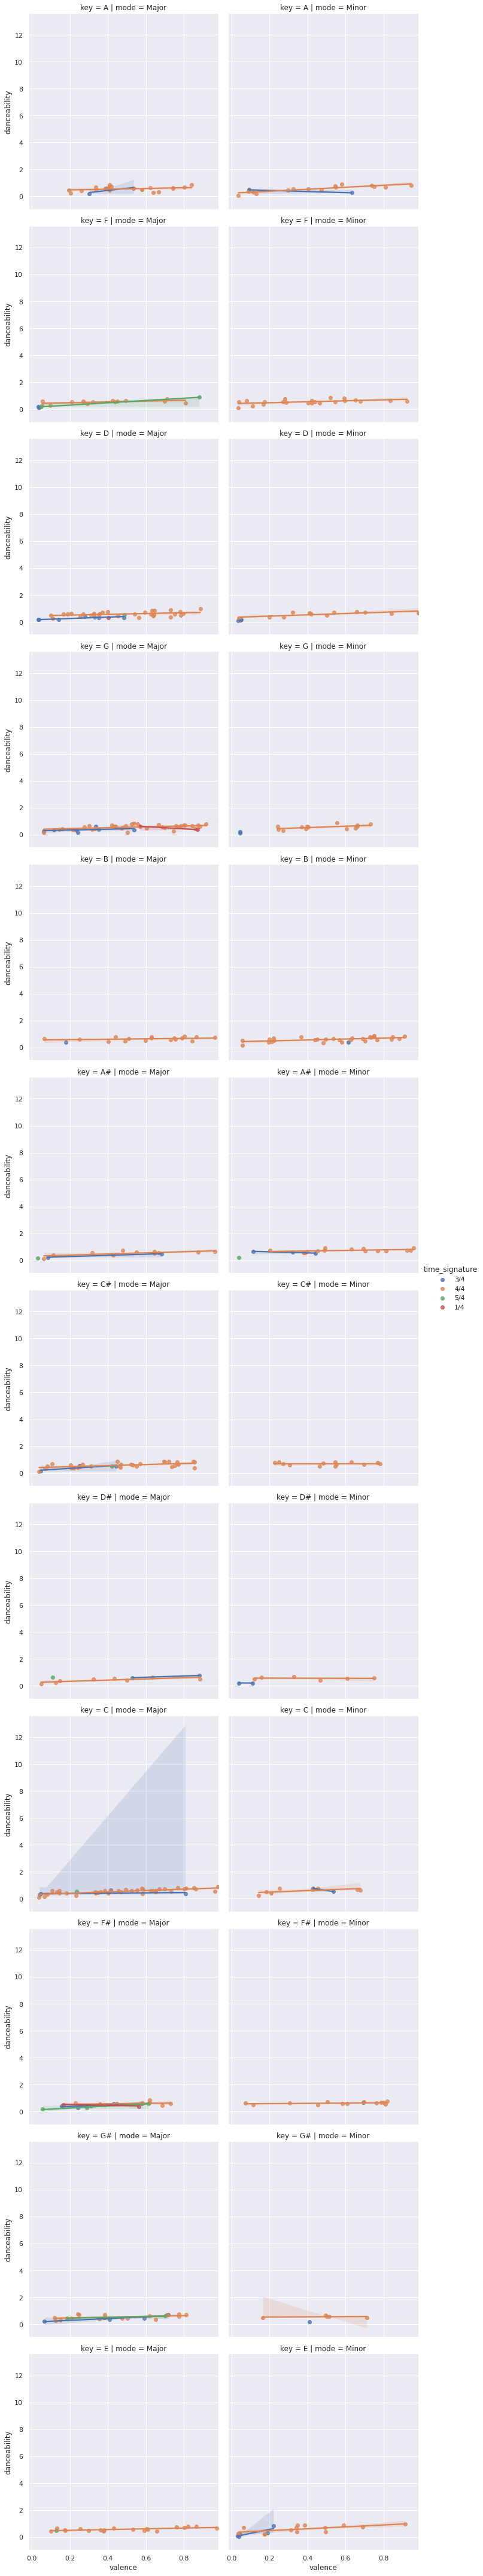

In [ ]:
sns.lmplot(x="valence", y="danceability", hue="time_signature",
           col="mode", row="key", data=test_one);

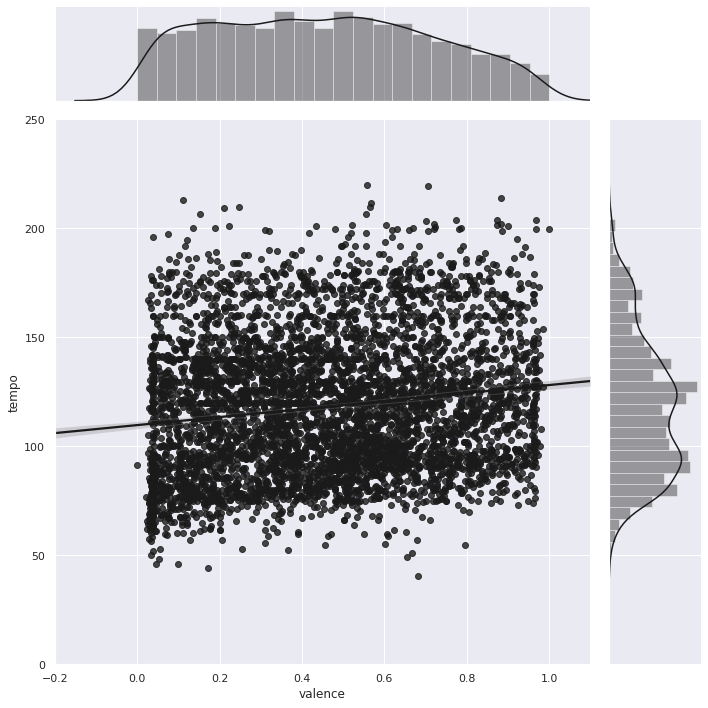

In [ ]:
import seaborn as sns
sns.set(style="darkgrid")

tips = []
g = sns.jointplot("valence", "tempo", data=test_one,
                  kind="reg", truncate=False,
                  xlim=(-.2, 1.1), ylim=(0, 250),
                  color="k", height=10)

ValueError: ignored

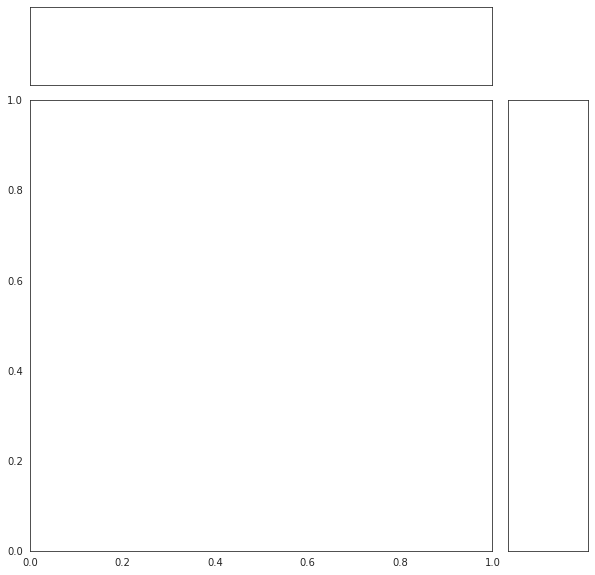

In [103]:
with sns.axes_style("white"):
    sns.jointplot('valence', 'danceability', kind="hex", color="k",height=10,data=spotifyfeatures);

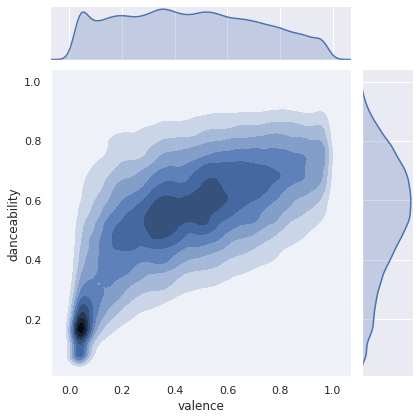

In [ ]:
sns.jointplot(x="valence", y="danceability", data=spotifyfeatures, kind="kde");

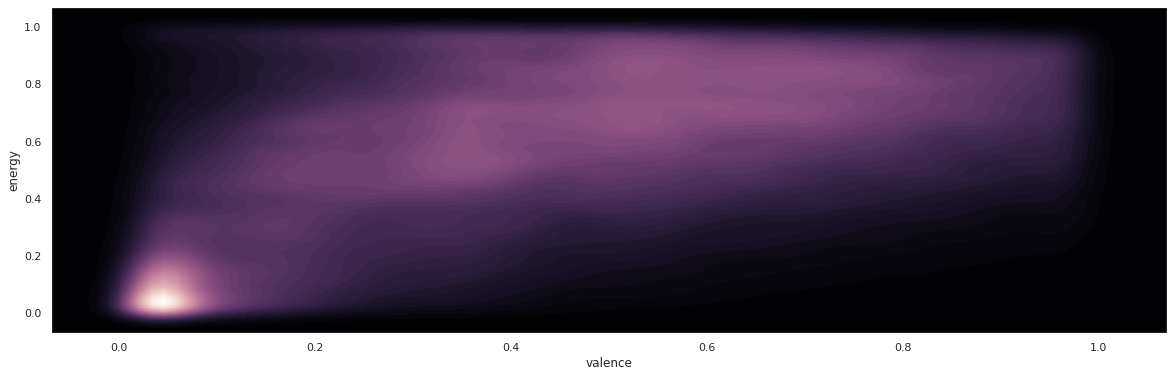

In [ ]:
f, ax = plt.subplots(figsize=(20, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(df.valence, df.energy, cmap=cmap, n_levels=60, shade=True);